In [7]:
# tylko nowe cechy
# liczba nowych cech to połowa oryginalnych cech
# sqrt(n) zaokrąglony w góre
# klasyfikatory - zafiksowac sensowne ustawienia
# wagi sumowane do 1
# lecim po wszystkich zbiorach czemu nie
# k-fold cross validation
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [8]:
datasets = load_datasets()

In [9]:
for k in datasets:
    print(k)
    print(datasets[k]['data'][:3,:])
    print([np.unique(datasets[k]['data'][:,i]).size for i in range(datasets[k]['data'].shape[1])], datasets[k]['data'].shape[0])

1czysty-cut
[[211.53336007 208.76702627]
 [189.53670249  77.4191745 ]
 [181.78462832 148.69785931]]
[1200, 1200] 1200
2delikatne-cut
[[-15.82525427 -14.73927865]
 [280.3667336  -14.10018775]
 [ 85.10847553 -51.58454252]]
[1200, 1200] 1200
3mocniej-cut
[[ 206.61279752 -101.92831295]
 [ 252.63037866  294.08535685]
 [  31.33210152  254.16272716]]
[1200, 1200] 1200
4delikatne-bezover-cut
[[191.84693455 -31.18285044]
 [236.34631621 264.84234467]
 [ 86.67644876  24.25356988]]
[1200, 1200] 1200
balance-scale
[[1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [1. 1. 1. 3.]]
[5, 5, 5, 5] 625
cleveland
[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    6. ]
 [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
    3. ]
 [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
    7. ]]
[41, 2, 4, 50, 152, 2, 3, 91, 2, 40, 3, 6, 5] 303
cleveland_v2
[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    6. ]
 [ 67.    1.    4.  160.  28

### One hot encoding for columns with less than 10 unique values

In [10]:
for k in datasets:
    df = pd.DataFrame(data=datasets[k]['data'])
    cutoff = 10

    encoded = pd.get_dummies(df, columns=df.columns[df.apply(pd.Series.nunique) < cutoff], drop_first=True)
    result_df = pd.concat([df, encoded], axis=1)
    datasets[k]['data'] = result_df.values

In [11]:
for k in datasets:
    print(k)
    print(datasets[k]['data'][:3,:])
    print([np.unique(datasets[k]['data'][:,i]).size for i in range(datasets[k]['data'].shape[1])], datasets[k]['data'].shape[0])

1czysty-cut
[[211.53336007 208.76702627 211.53336007 208.76702627]
 [189.53670249  77.4191745  189.53670249  77.4191745 ]
 [181.78462832 148.69785931 181.78462832 148.69785931]]
[1200, 1200, 1200, 1200] 1200
2delikatne-cut
[[-15.82525427 -14.73927865 -15.82525427 -14.73927865]
 [280.3667336  -14.10018775 280.3667336  -14.10018775]
 [ 85.10847553 -51.58454252  85.10847553 -51.58454252]]
[1200, 1200, 1200, 1200] 1200
3mocniej-cut
[[ 206.61279752 -101.92831295  206.61279752 -101.92831295]
 [ 252.63037866  294.08535685  252.63037866  294.08535685]
 [  31.33210152  254.16272716   31.33210152  254.16272716]]
[1200, 1200, 1200, 1200] 1200
4delikatne-bezover-cut
[[191.84693455 -31.18285044 191.84693455 -31.18285044]
 [236.34631621 264.84234467 236.34631621 264.84234467]
 [ 86.67644876  24.25356988  86.67644876  24.25356988]]
[1200, 1200, 1200, 1200] 1200
balance-scale
[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 

In [12]:
config = ex.config_calculation_strategy2(datasets)

In [13]:
# config['cleveland'] = {
# 'nn_config': {
#     'units_1st_layer': 13,
#     'units_2nd_layer': 64,
#     'units_3rd_layer': 32,
#     'units_latent_layer': 6
# },
# "weighted_triplet_loss": True,
# "lr": 1e-4,
# "batch_size": 16,
# "gamma": 0.95,
# "epochs": 100
# }

# config['2delikatne-cut'] = {
# 'nn_config': {
#     'units_1st_layer': 2,
#     'units_2nd_layer': 8,
#     'units_3rd_layer': 4,
#     'units_latent_layer': 2
# },
# 'weighted_triplet_loss': True,
# 'lr': 1e-4,
# 'batch_size': 16,
# 'gamma': 0.95,
# 'epochs': 100
# }

# config['3mocniej-cut'] = {
# 'nn_config': {
#     'units_1st_layer': 2,
#     'units_2nd_layer': 8,
#     'units_3rd_layer': 4,
#     'units_latent_layer': 2
# },
# 'weighted_triplet_loss': True,
# 'lr': 1e-4,
# 'batch_size': 16,
# 'gamma': 0.95,
# 'epochs': 100
# }

# config['cmc'] = {'nn_config': {'units_1st_layer': 9,
#    'units_2nd_layer': 16,
#    'units_3rd_layer': 8,
#    'units_latent_layer': 4},
#   'weighted_triplet_loss': True,
#   'lr': 1e-4,
#   'batch_size': 32,
#   'gamma': 0.95,
#   'epochs': 100
# }

# config['dermatology'] = {'nn_config': {'units_1st_layer': 34,
#    'units_2nd_layer': 64,
#    'units_3rd_layer': 32,
#    'units_latent_layer': 8},
#   'weighted_triplet_loss': True,
#   'lr': 1e-4,
#   'batch_size': 32,
#   'gamma': 0.95,
#   'epochs': 100}

In [14]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 4,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 4,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 4,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 4,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 'balance-scale': {'nn_config': {'uni

In [15]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced')
        } 
    return classifiers

1czysty-cut


100%|██████████| 240/240 [00:00<00:00, 3715.51it/s]


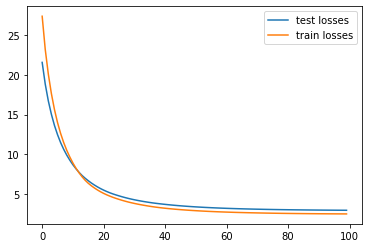

100%|██████████| 240/240 [00:00<00:00, 3463.36it/s]


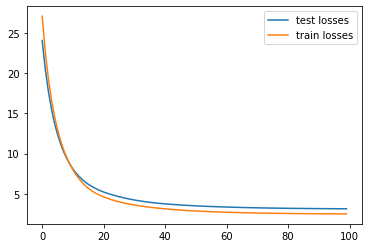

100%|██████████| 240/240 [00:00<00:00, 3442.00it/s]


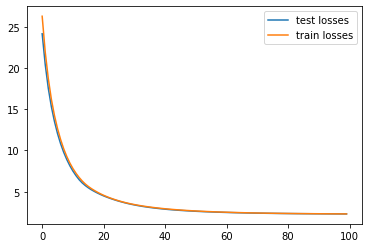

100%|██████████| 240/240 [00:00<00:00, 3439.40it/s]


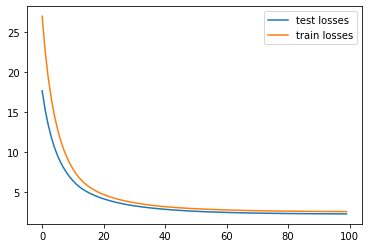

100%|██████████| 240/240 [00:00<00:00, 3545.33it/s]


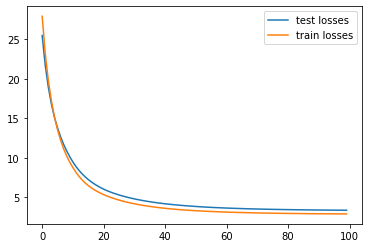

2delikatne-cut


100%|██████████| 240/240 [00:00<00:00, 3318.46it/s]


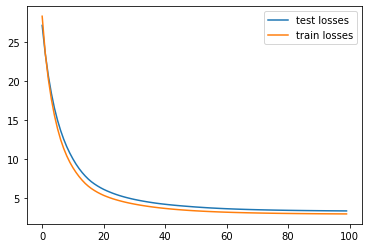

100%|██████████| 240/240 [00:00<00:00, 3096.40it/s]


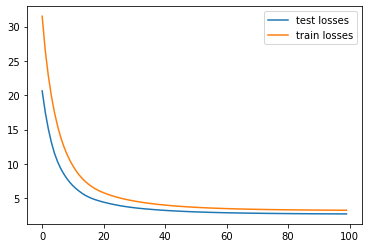

100%|██████████| 240/240 [00:00<00:00, 3370.88it/s]


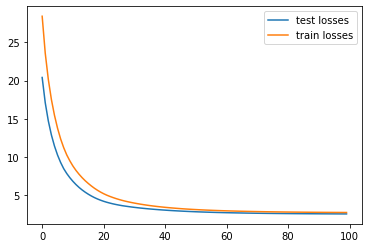

100%|██████████| 240/240 [00:00<00:00, 3237.94it/s]


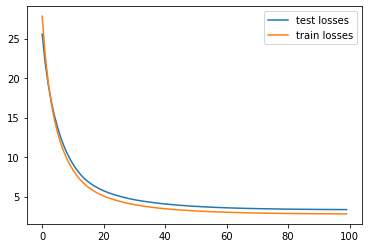

100%|██████████| 240/240 [00:00<00:00, 3337.89it/s]


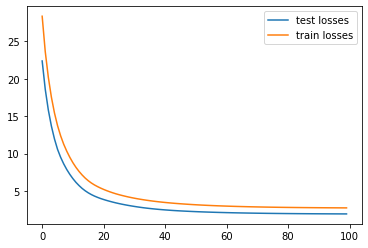

3mocniej-cut


100%|██████████| 240/240 [00:00<00:00, 3442.32it/s]


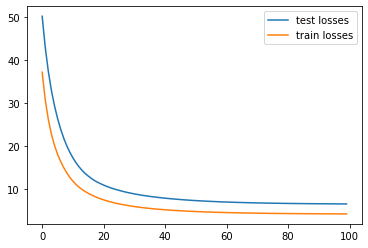

100%|██████████| 240/240 [00:00<00:00, 3344.01it/s]


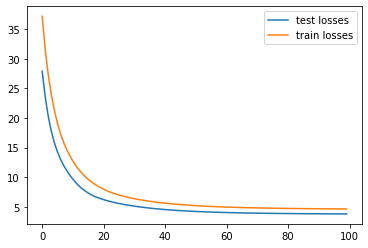

100%|██████████| 240/240 [00:00<00:00, 3463.46it/s]


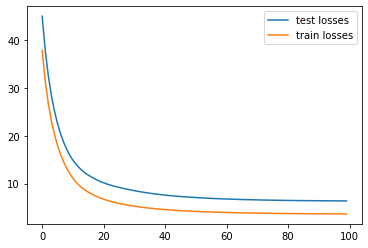

100%|██████████| 240/240 [00:00<00:00, 3233.74it/s]


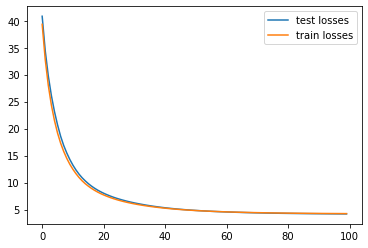

100%|██████████| 240/240 [00:00<00:00, 3355.63it/s]


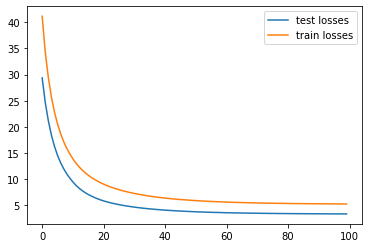

4delikatne-bezover-cut


100%|██████████| 240/240 [00:00<00:00, 3458.39it/s]


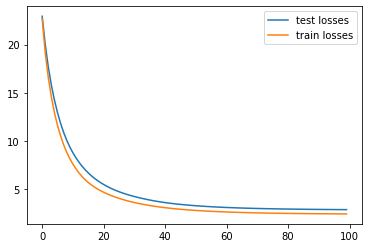

100%|██████████| 240/240 [00:00<00:00, 3100.29it/s]


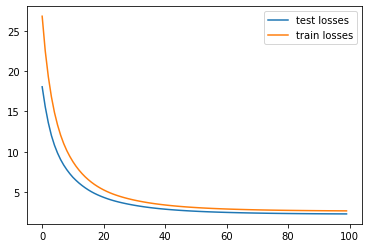

100%|██████████| 240/240 [00:00<00:00, 3376.68it/s]


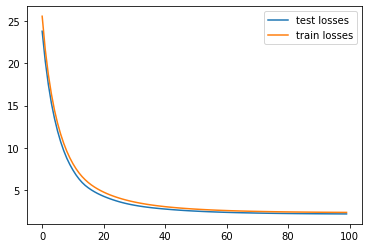

100%|██████████| 240/240 [00:00<00:00, 3084.94it/s]


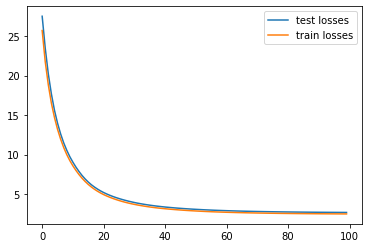

100%|██████████| 240/240 [00:00<00:00, 3509.50it/s]


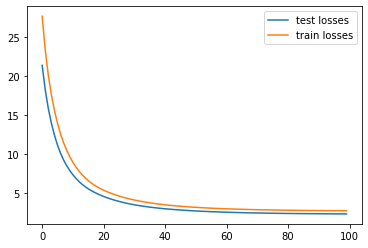

balance-scale


100%|██████████| 125/125 [00:00<00:00, 3349.38it/s]


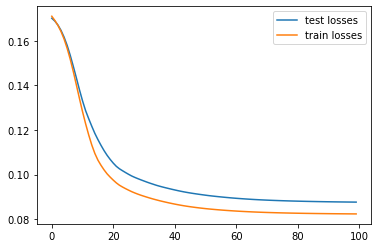

100%|██████████| 125/125 [00:00<00:00, 3372.10it/s]


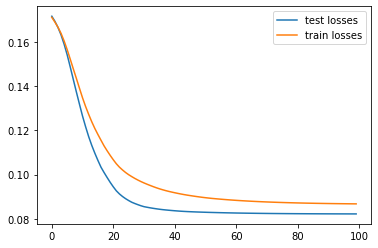

100%|██████████| 125/125 [00:00<00:00, 3359.74it/s]


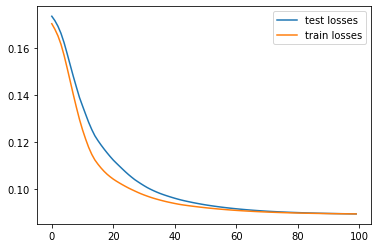

100%|██████████| 125/125 [00:00<00:00, 3390.03it/s]


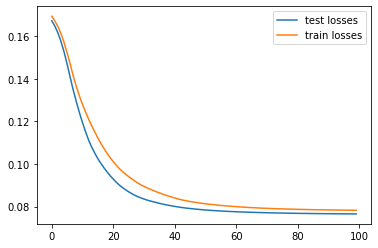

100%|██████████| 125/125 [00:00<00:00, 3310.57it/s]


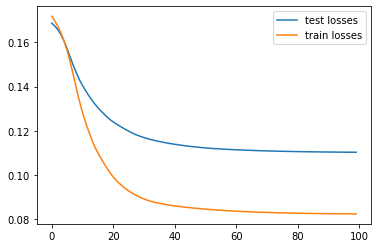

cleveland


100%|██████████| 61/61 [00:00<00:00, 3193.01it/s]


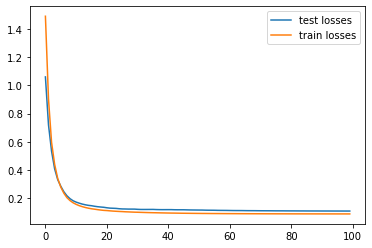

100%|██████████| 61/61 [00:00<00:00, 3215.52it/s]


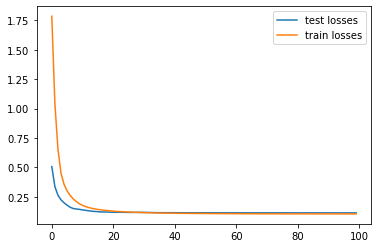

100%|██████████| 61/61 [00:00<00:00, 3385.05it/s]


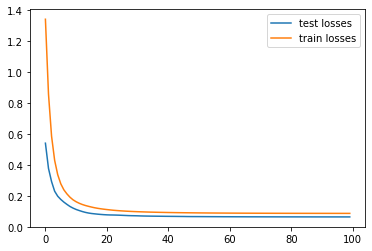

100%|██████████| 60/60 [00:00<00:00, 3199.36it/s]


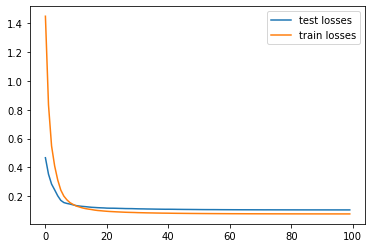

100%|██████████| 60/60 [00:00<00:00, 3124.44it/s]


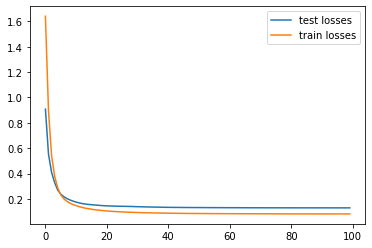

cleveland_v2


100%|██████████| 61/61 [00:00<00:00, 3183.91it/s]


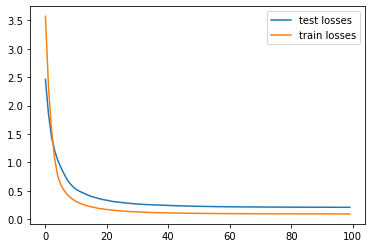

100%|██████████| 61/61 [00:00<00:00, 2963.52it/s]


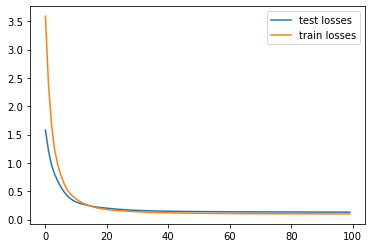

100%|██████████| 61/61 [00:00<00:00, 3015.07it/s]


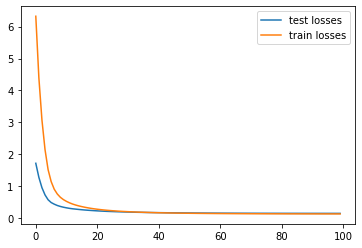

100%|██████████| 60/60 [00:00<00:00, 3106.85it/s]


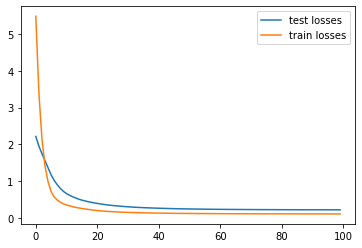

100%|██████████| 60/60 [00:00<00:00, 2960.51it/s]


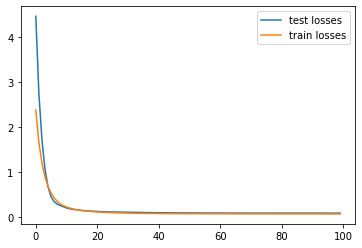

cmc


100%|██████████| 295/295 [00:00<00:00, 3270.18it/s]


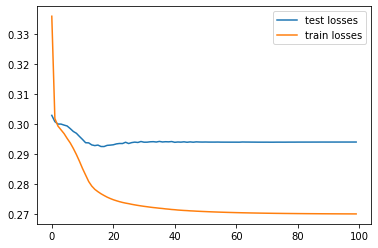

100%|██████████| 295/295 [00:00<00:00, 3442.09it/s]


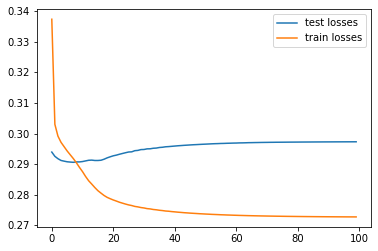

100%|██████████| 295/295 [00:00<00:00, 3247.41it/s]


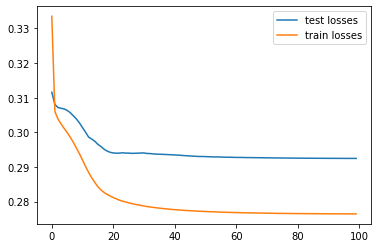

100%|██████████| 294/294 [00:00<00:00, 3294.72it/s]


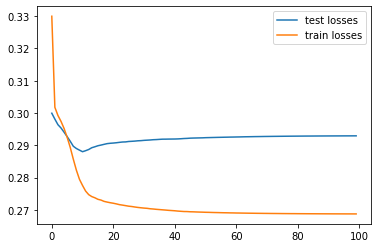

100%|██████████| 294/294 [00:00<00:00, 3350.97it/s]


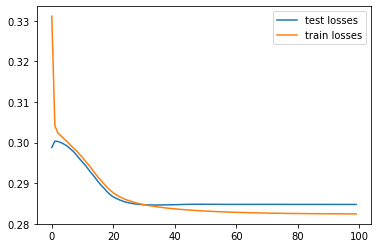

dermatology


100%|██████████| 74/74 [00:00<00:00, 3124.94it/s]


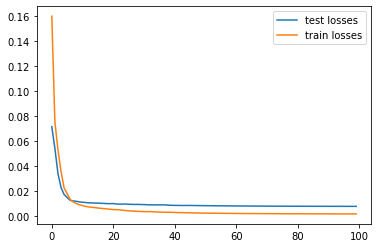

100%|██████████| 73/73 [00:00<00:00, 2993.59it/s]


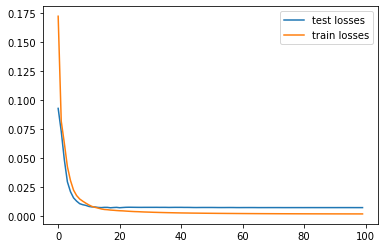

100%|██████████| 73/73 [00:00<00:00, 3152.77it/s]


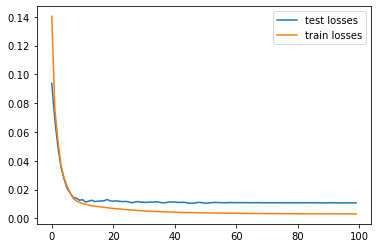

100%|██████████| 73/73 [00:00<00:00, 3024.46it/s]


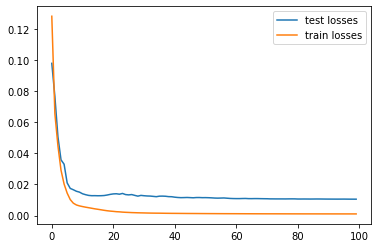

100%|██████████| 73/73 [00:00<00:00, 3461.82it/s]


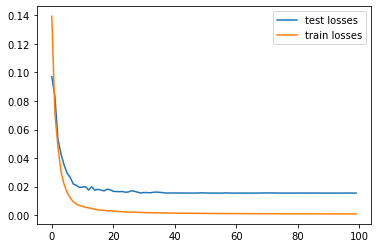

glass


100%|██████████| 43/43 [00:00<00:00, 3428.22it/s]


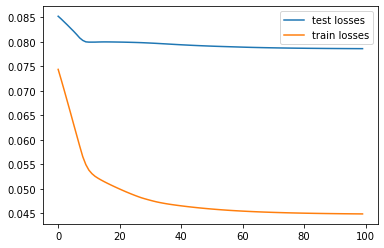

100%|██████████| 43/43 [00:00<00:00, 3505.10it/s]


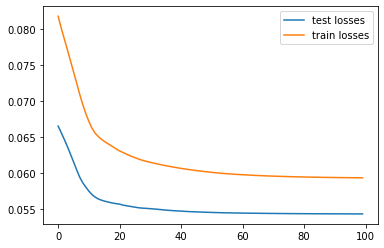

100%|██████████| 43/43 [00:00<00:00, 3389.62it/s]


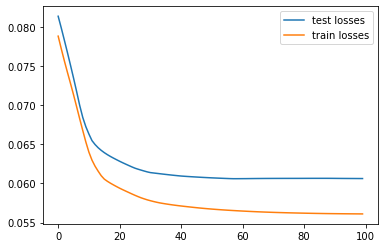

100%|██████████| 43/43 [00:00<00:00, 3556.88it/s]


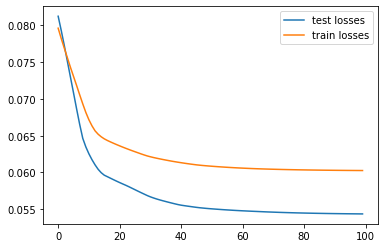

100%|██████████| 42/42 [00:00<00:00, 3368.34it/s]


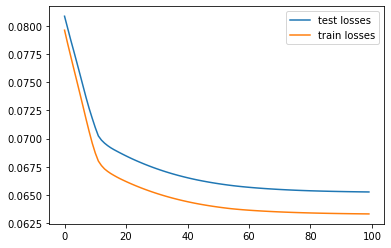

hayes-roth


100%|██████████| 32/32 [00:00<00:00, 3385.57it/s]


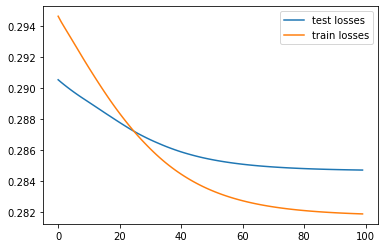

100%|██████████| 32/32 [00:00<00:00, 3410.70it/s]


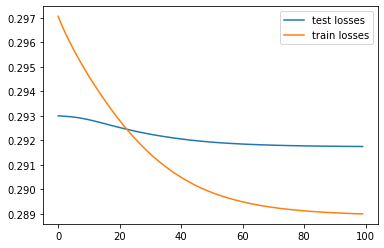

100%|██████████| 32/32 [00:00<00:00, 3353.18it/s]


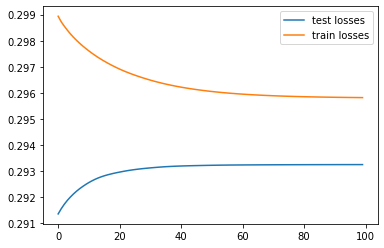

100%|██████████| 32/32 [00:00<00:00, 3422.18it/s]


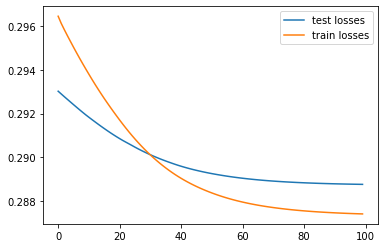

100%|██████████| 32/32 [00:00<00:00, 3437.25it/s]


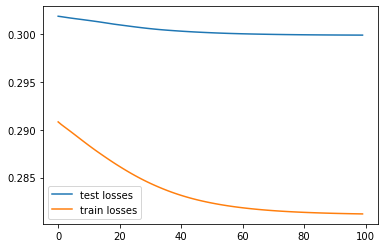

new_ecoli


100%|██████████| 68/68 [00:00<00:00, 3588.08it/s]


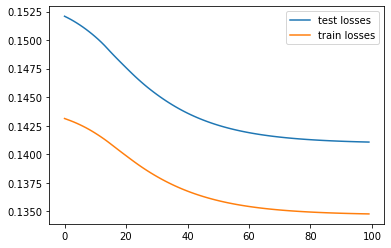

100%|██████████| 67/67 [00:00<00:00, 3167.37it/s]


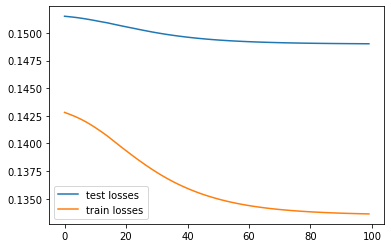

100%|██████████| 67/67 [00:00<00:00, 3239.29it/s]


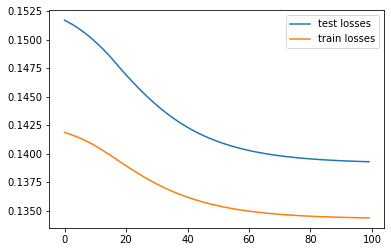

100%|██████████| 67/67 [00:00<00:00, 3563.55it/s]


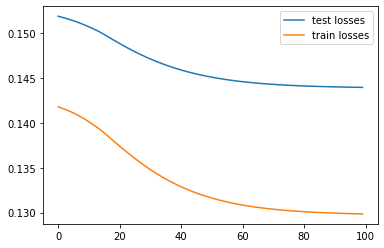

100%|██████████| 67/67 [00:00<00:00, 3385.36it/s]


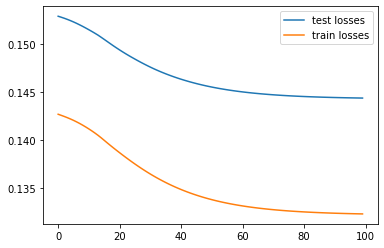

new_led7digit


100%|██████████| 100/100 [00:00<00:00, 3484.19it/s]


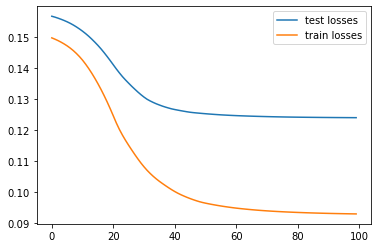

100%|██████████| 100/100 [00:00<00:00, 3081.01it/s]


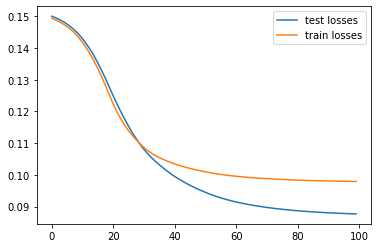

100%|██████████| 100/100 [00:00<00:00, 3272.48it/s]


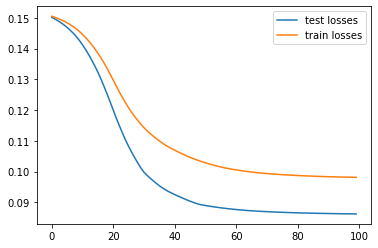

100%|██████████| 100/100 [00:00<00:00, 3120.55it/s]


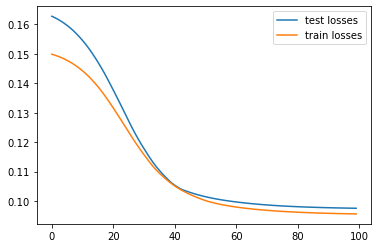

100%|██████████| 100/100 [00:00<00:00, 3149.18it/s]


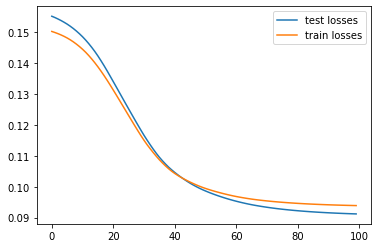

new_vehicle


100%|██████████| 170/170 [00:00<00:00, 3591.43it/s]


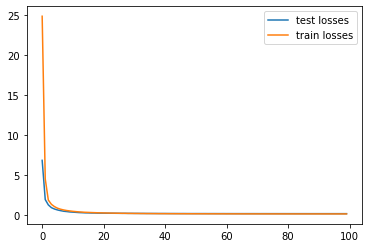

100%|██████████| 169/169 [00:00<00:00, 3539.82it/s]


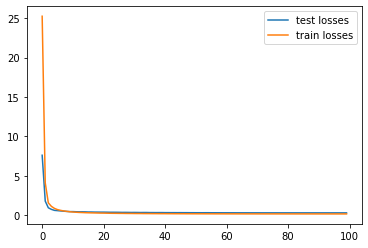

100%|██████████| 169/169 [00:00<00:00, 3574.43it/s]


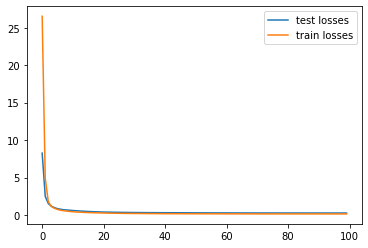

100%|██████████| 169/169 [00:00<00:00, 3562.37it/s]


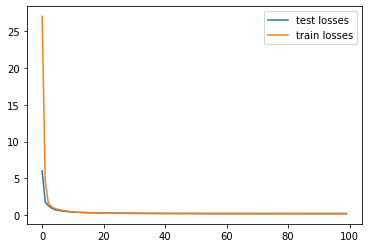

100%|██████████| 169/169 [00:00<00:00, 3503.98it/s]


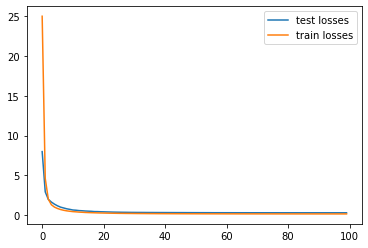

new_winequality-red


100%|██████████| 320/320 [00:00<00:00, 3337.87it/s]


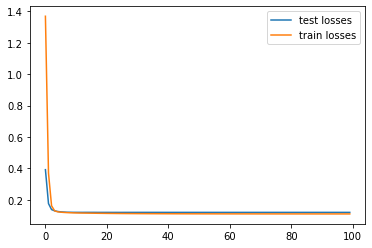

100%|██████████| 320/320 [00:00<00:00, 3631.81it/s]


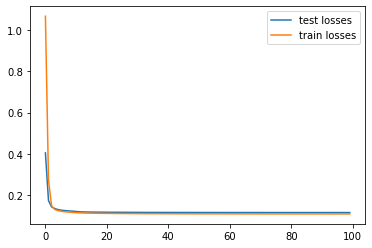

100%|██████████| 320/320 [00:00<00:00, 3487.55it/s]


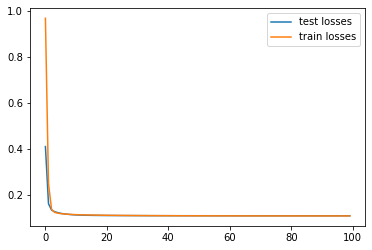

100%|██████████| 320/320 [00:00<00:00, 3529.18it/s]


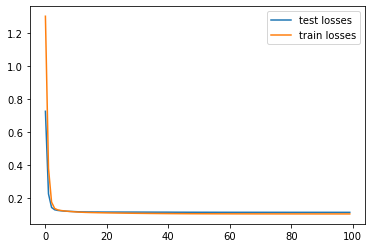

100%|██████████| 319/319 [00:00<00:00, 3512.86it/s]


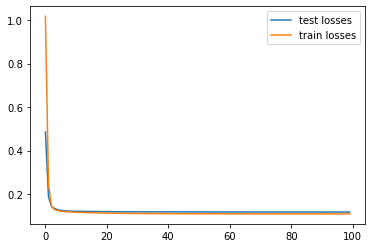

new_yeast


100%|██████████| 297/297 [00:00<00:00, 3557.89it/s]


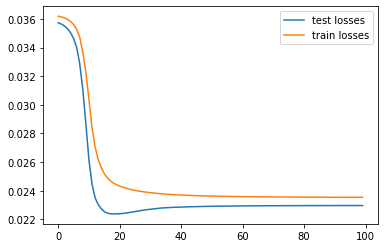

100%|██████████| 297/297 [00:00<00:00, 3511.06it/s]


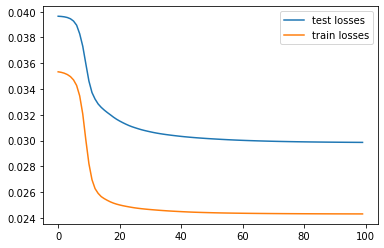

100%|██████████| 297/297 [00:00<00:00, 3529.39it/s]


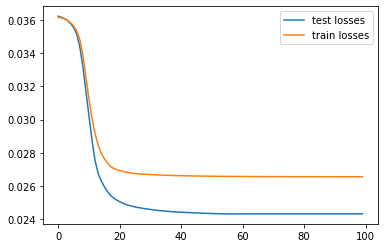

100%|██████████| 297/297 [00:00<00:00, 3271.59it/s]


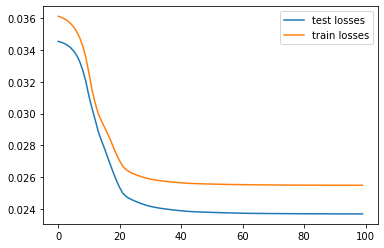

100%|██████████| 296/296 [00:00<00:00, 3620.14it/s]


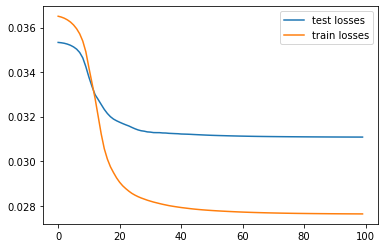

thyroid-newthyroid


100%|██████████| 43/43 [00:00<00:00, 2885.03it/s]


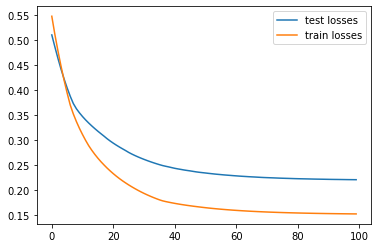

100%|██████████| 43/43 [00:00<00:00, 3466.23it/s]


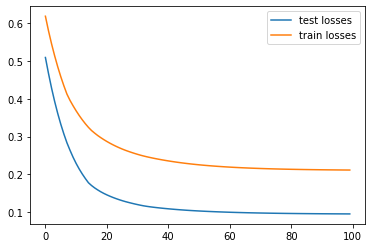

100%|██████████| 43/43 [00:00<00:00, 3445.90it/s]


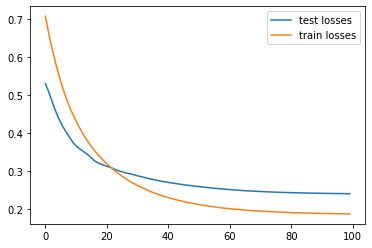

100%|██████████| 43/43 [00:00<00:00, 3377.50it/s]


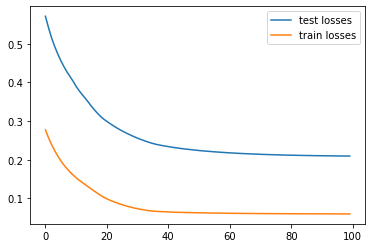

100%|██████████| 43/43 [00:00<00:00, 3524.76it/s]


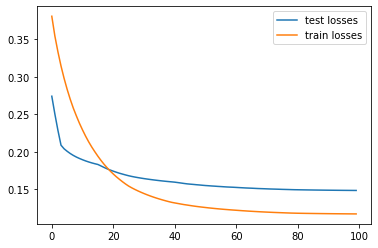

In [16]:
result_dict = defaultdict(list)

# for dataset_name in ['glass']:
for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    fold_result_dict = defaultdict(list)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train, y_train, X_test, y_test, weights,cfg)
        X_train_new = np.hstack([X_train, embeddings_train])
        X_test_new = np.hstack([X_test, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))
        
            
            #f1, gmean
    # mean over folds
    # wiersze: datasety, 
    # kolumny -> klasyfikatory (przed dodaniem cech, po dodaniu, na samych nowych cechach)

In [17]:
results_df = pd.DataFrame.from_dict(result_dict)

In [18]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,RF24-f1-old+new-features,RF24-gmean-old+new-features,DT-f1-old+new-features,DT-gmean-old+new-features,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features
0,1czysty-cut,0.928593,0.934765,0.935490,0.936512,0.944957,0.946715,0.930516,0.942146,0.937348,0.948388,0.903378,0.916272
1,2delikatne-cut,0.757241,0.746203,0.721450,0.733821,0.759456,0.753281,0.737250,0.744304,0.760163,0.749619,0.723781,0.736487
2,3mocniej-cut,0.566813,0.522185,0.510395,0.505998,0.562372,0.505427,0.512869,0.505267,0.563024,0.487318,0.528996,0.520714
3,4delikatne-bezover-cut,0.815342,0.831648,0.797895,0.816954,0.821963,0.832469,0.809713,0.820617,0.824827,0.830006,0.806280,0.825711
4,balance-scale,0.586919,0.092880,0.565339,0.171120,0.776794,0.741777,0.728067,0.685537,0.772691,0.741750,0.714820,0.661687
5,cleveland,0.316984,0.096811,0.325690,0.183910,0.284551,0.075782,0.247487,0.073838,0.316383,0.157908,0.255129,0.080052
6,cleveland_v2,0.320120,0.055699,0.335967,0.155365,0.413254,0.198735,0.346619,0.144067,0.302077,0.099187,0.350643,0.141113
7,cmc,0.522460,0.520194,0.470766,0.473769,0.511350,0.496484,0.433049,0.432489,0.508410,0.495157,0.448524,0.451143
8,dermatology,0.969314,0.964939,0.947284,0.948507,0.947003,0.941709,0.888199,0.879079,0.946801,0.940779,0.901441,0.893380
9,glass,0.724524,0.480106,0.652585,0.453906,0.757467,0.650509,0.695250,0.479572,0.651128,0.491102,0.609805,0.428553


In [19]:
results_df.filter(regex=("dataset|RF24-f1*"))

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,1czysty-cut,0.928593,0.944957,0.937348
1,2delikatne-cut,0.757241,0.759456,0.760163
2,3mocniej-cut,0.566813,0.562372,0.563024
3,4delikatne-bezover-cut,0.815342,0.821963,0.824827
4,balance-scale,0.586919,0.776794,0.772691
5,cleveland,0.316984,0.284551,0.316383
6,cleveland_v2,0.320120,0.413254,0.302077
7,cmc,0.522460,0.511350,0.508410
8,dermatology,0.969314,0.947003,0.946801
9,glass,0.724524,0.757467,0.651128


In [20]:
results_df.filter(regex=("dataset|RF24-gmean*"))

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,1czysty-cut,0.934765,0.946715,0.948388
1,2delikatne-cut,0.746203,0.753281,0.749619
2,3mocniej-cut,0.522185,0.505427,0.487318
3,4delikatne-bezover-cut,0.831648,0.832469,0.830006
4,balance-scale,0.092880,0.741777,0.741750
5,cleveland,0.096811,0.075782,0.157908
6,cleveland_v2,0.055699,0.198735,0.099187
7,cmc,0.520194,0.496484,0.495157
8,dermatology,0.964939,0.941709,0.940779
9,glass,0.480106,0.650509,0.491102


In [21]:
results_df.filter(regex=("dataset|DT-f1*"))

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,1czysty-cut,0.935490,0.930516,0.903378
1,2delikatne-cut,0.721450,0.737250,0.723781
2,3mocniej-cut,0.510395,0.512869,0.528996
3,4delikatne-bezover-cut,0.797895,0.809713,0.806280
4,balance-scale,0.565339,0.728067,0.714820
5,cleveland,0.325690,0.247487,0.255129
6,cleveland_v2,0.335967,0.346619,0.350643
7,cmc,0.470766,0.433049,0.448524
8,dermatology,0.947284,0.888199,0.901441
9,glass,0.652585,0.695250,0.609805


In [22]:
results_df.filter(regex=("dataset|DT-gmean*"))

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,1czysty-cut,0.936512,0.942146,0.916272
1,2delikatne-cut,0.733821,0.744304,0.736487
2,3mocniej-cut,0.505998,0.505267,0.520714
3,4delikatne-bezover-cut,0.816954,0.820617,0.825711
4,balance-scale,0.171120,0.685537,0.661687
5,cleveland,0.183910,0.073838,0.080052
6,cleveland_v2,0.155365,0.144067,0.141113
7,cmc,0.473769,0.432489,0.451143
8,dermatology,0.948507,0.879079,0.893380
9,glass,0.453906,0.479572,0.428553
